In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt, seaborn as sns
from matplotlib.artist import Artist

In [2]:
df = pd.read_csv("./SGRPmTOR_finalreckoning.csv")

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [4]:
df.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-1 uM Torin 1,75.622916,2.134292,79.950705,1.244014,NCYC 3264,DBVPG 6765,1 uM Torin 1,DBVPG 6765*1 uM Torin 1,0,0.109667,0.145667,0.179667,0.229667,0.302333,0.394333,0.508667,0.630000,0.766333,0.905333,1.035333,1.137333,1.167000,1.194667,1.216333,1.247000,1.270000,1.295667,1.322333,1.353000,1.381667,1.409667,1.431667,1.461667,1.479667,1.496000,1.520667,1.521333,1.550000,1.566333,1.579667,1.597000,1.607000,1.620667,1.630333,1.644333,1.644667,1.653667,1.673000,1.672333
3,_lowTORIN_KGPUMBL_052817.xls,NCYC 3264-2.5% DMSO,75.872172,2.820883,78.778806,3.535895,NCYC 3264,DBVPG 6765,2.5% DMSO,DBVPG 6765*2.5% DMSO,0,0.101333,0.135000,0.160667,0.205333,0.267000,0.350333,0.455000,0.577667,0.714667,0.857333,0.994000,1.113000,1.167333,1.194667,1.225333,1.246667,1.271333,1.301000,1.325667,1.354333,1.385333,1.415000,1.435333,1.463333,1.483333,1.502667,1.520667,1.525000,1.554000,1.576333,1.585667,1.602667,1.617667,1.629333,1.640000,1.655000,1.658667,1.666667,1.679333,1.685000
4,_lowTORIN_KGPUMBL_052817.xls,NCYC 3265-1 uM Torin 1,83.891908,3.952745,106.127244,26.093053,NCYC 3265,SK1,1 uM Torin 1,SK1*1 uM Torin 1,0,0.048333,0.063667,0.076667,0.093667,0.119000,0.150667,0.192000,0.237000,0.298000,0.371333,0.439667,0.504333,0.558333,0.593333,0.618667,0.638333,0.654000,0.669000,0.687000,0.708333,0.729000,0.748667,0.764000,0.785000,0.801667,0.815333,0.840000,0.847667,0.871000,0.884333,0.900667,0.915333,0.930333,0.948333,0.960000,0.977000,0.980667,0.993333,1.015667,1.020000


In [5]:
df.columns

Index(['experiment', 'Line-Treatment', 'DT inflection', 'StDev_inf',
       'DT interval', 'StDev_int', 'Lab strain', 'Strain', 'Treatment',
       'Strain*Treatment', 'Time_0', 'Time_0.5', 'Time_1', 'Time_1.5',
       'Time_2', 'Time_2.5', 'Time_3', 'Time_3.5', 'Time_4', 'Time_4.5',
       'Time_5', 'Time_5.5', 'Time_6', 'Time_6.5', 'Time_7', 'Time_7.5',
       'Time_8', 'Time_8.5', 'Time_9', 'Time_9.5', 'Time_10', 'Time_10.5',
       'Time_11', 'Time_11.5', 'Time_12', 'Time_12.5', 'Time_13', 'Time_13.5',
       'Time_14', 'Time_14.5', 'Time_15', 'Time_15.5', 'Time_16', 'Time_16.5',
       'Time_17', 'Time_17.5', 'Time_18', 'Time_18.5', 'Time_19', 'Time_19.5',
       'Time_20'],
      dtype='object')

### Identifying **Experiments**, **Treatments** and **Lab Strains**

In [6]:
experiments = list(df.experiment.unique())
line_treatments = list(df['Line-Treatment'].unique())
treatments = list(df.Treatment.unique())
strains = list(df['Lab strain'].unique())

In [7]:
print("Number of Experiments: ", len(experiments))

Number of Experiments:  59


In [8]:
for i in range(1, 60):
    print(f"Experiment_{i}: ", experiments[i-1])

Experiment_1:  _lowTORIN_KGPUMBL_052817.xls
Experiment_2:  original data.xls SET 4 HIGH RAPA
Experiment_3:  RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls
Experiment_4:  SCREEN_SET2_HIGHTORIN#3_MGK_09302017_F.xls
Experiment_5:  SET1GDC_ARMBL_080217.xls
Experiment_6:  SET2_caffeine_KGPU_080517.xls
Experiment_7:  SET2AZDredo+highTORINMBL_07302017.xls
Experiment_8:  SET3_Low Rapa_REDO_MGK_081117.xls
Experiment_9:  SET4_highTORIN_REDO_NBMBL_080717.xls
Experiment_10:  SGRP_mTOR_inhibitsSCREEN_SET1_GDC_redo_JE_092617.xls
Experiment_11:  SGRP_mTOR_inhibitsSCREEN_SET1_highgdc-0941_AR_053117.xls
Experiment_12:  SGRP_mTOR_inhibitsSCREEN_SET1_highTORIN_KGPUMBL_052817.xls
Experiment_13:  SGRP_mTOR_inhibitsSCREEN_SET1_lowRAPA_redo2_KG_092317.xls
Experiment_14:  SGRP_mTOR_inhibitsSCREEN_SET2_HIGH_TORIN_AR_10092017_F.xls
Experiment_15:  SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTorin_Repeat_JEMBL_073
Experiment_16:  SGRP_mTOR_inhibitsSCREEN_SET2_highTORIN_JEMBL_081717.xls
Experiment_17:  SGRP_mTOR_inhibit

In [9]:
print("Types of Line-Treatments: ", len(line_treatments))

Types of Line-Treatments:  1122


In [10]:
for i in range(1, 1123):
    print(f"Line_Treatment_{i}: ", line_treatments[i-1])

Line_Treatment_1:  WT-1 uM Torin 1
Line_Treatment_2:  WT-2.5% DMSO
Line_Treatment_3:  NCYC 3264-1 uM Torin 1
Line_Treatment_4:  NCYC 3264-2.5% DMSO
Line_Treatment_5:  NCYC 3265-1 uM Torin 1
Line_Treatment_6:  NCYC 3265-2.5% DMSO
Line_Treatment_7:  NCYC 3266-1 uM Torin 1
Line_Treatment_8:  NCYC 3266-2.5% DMSO
Line_Treatment_9:  NCYC 3284-1 uM Torin 1
Line_Treatment_10:  NCYC 3284-2.5% DMSO
Line_Treatment_11:  NCYC 3290-1 uM Torin 1
Line_Treatment_12:  NCYC 3290-2.5% DMSO
Line_Treatment_13:  NCYC 3311-1 uM Torin 1
Line_Treatment_14:  NCYC 3311-2.5% DMSO
Line_Treatment_15:  NCYC 3312-1 uM Torin 1
Line_Treatment_16:  NCYC 3312-2.5% DMSO
Line_Treatment_17:  NCYC 3313-1 uM Torin 1
Line_Treatment_18:  NCYC 3313-2.5% DMSO
Line_Treatment_19:  NCYC 3314-1 uM Torin 1
Line_Treatment_20:  NCYC 3314-2.5% DMSO
Line_Treatment_21:  NCYC 3315-1 uM Torin 1
Line_Treatment_22:  NCYC 3315-2.5% DMSO
Line_Treatment_23:  NCYC 3318-1 uM Torin 1
Line_Treatment_24:  NCYC 3318-2.5% DMSO
Line_Treatment_25:  NCYC 33

In [11]:
print("Types of Treatments: ", len(treatments))

Types of Treatments:  10


In [12]:
for i in range(1, 11):
    print(f"Treatmemt_{i}: ", treatments[i-1])

Treatmemt_1:  1 uM Torin 1
Treatmemt_2:  2.5% DMSO
Treatmemt_3:  1% DMSO
Treatmemt_4:  20 ng/mL RAPA
Treatmemt_5:  2.5 ng/mL RAPA
Treatmemt_6:  6.67% H2O
Treatmemt_7:  25 uM Torin 1
Treatmemt_8:  100 uM GDC0941
Treatmemt_9:  1 mg/mL Caffeine
Treatmemt_10:  100 uM AZD8055


In [13]:
print("Number of Strains: ", len(strains))

Number of Strains:  90


In [14]:
for i in range(1, 91):
    print(f"Strain_{i}: ", strains[i-1])

Strain_1:  BY4743
Strain_2:  NCYC 3264
Strain_3:  NCYC 3265
Strain_4:  NCYC 3266
Strain_5:  NCYC 3284
Strain_6:  NCYC 3290
Strain_7:  NCYC 3311
Strain_8:  NCYC 3312
Strain_9:  NCYC 3313
Strain_10:  NCYC 3314
Strain_11:  NCYC 3315
Strain_12:  NCYC 3318
Strain_13:  NCYC 3319
Strain_14:  NCYC 3445
Strain_15:  NCYC 3447
Strain_16:  NCYC 3448
Strain_17:  NCYC 3449
Strain_18:  NCYC 3451
Strain_19:  NCYC 3452
Strain_20:  NCYC 3453
Strain_21:  NCYC 3454
Strain_22:  NCYC 3455
Strain_23:  NCYC 3456
Strain_24:  NCYC 3457
Strain_25:  yML 683
Strain_26:  yML 684
Strain_27:  yML 685
Strain_28:  yML 686
Strain_29:  yML 687
Strain_30:  yML 688
Strain_31:  yML 689
Strain_32:  yML 690
Strain_33:  yML 691
Strain_34:  yML 692
Strain_35:  yML 693
Strain_36:  yML 694
Strain_37:  yML 695
Strain_38:  yML 696
Strain_39:  yML 697
Strain_40:  yML 698
Strain_41:  yML 699
Strain_42:  yML 707
Strain_43:  yML 708
Strain_44:  NCYC 3467
Strain_45:  yML 559
Strain_46:  yML 569
Strain_47:  yML 669
Strain_48:  yML 677
St

> ## **Structuring the Dataset**

In [15]:
def struct_data(df, kind, subKind):
    return (df[df[kind] == subKind]).reset_index(drop=True)

def save_file(file, file_name, by_kind):
            return file.to_csv(str(Path().absolute())+f"/Data/{by_kind}/"+ file_name + ".csv", index=False)

def file_check(path):
    if os.path.isfile(path):
        return False
    else:
        return True

In [16]:
kind = ['experiment', 'Line-Treatment', 'Strain', 'Treatment']
by_kind = ['By Experiment', 'By Line-Treatment', 'By Strain', 'By Treatment']
path0 = str(Path().absolute())+f"/Data/{by_kind[0]}/Experiment_1.csv"
path1 = str(Path().absolute())+f"/Data/{by_kind[1]}/Line_Treatment_1.csv"
path2 = str(Path().absolute())+f"/Data/{by_kind[2]}/Strain_1.csv"
path3 = str(Path().absolute())+f"/Data/{by_kind[3]}/Treatment_1.csv"

### By Experiment

In [17]:
if file_check(path0):
    for i in range (1, 60):
        file = struct_data(df, kind[0], experiments[i-1])
        file_name = f"Experiment_{i}"
        save_file(file, file_name, by_kind[0])

### By Line-Treatment

In [18]:
if file_check(path1):
    for i in range (1, 1123):
        file = struct_data(df, kind[1], line_treatments[i-1])
        file_name = f"Line_Treatment_{i}"
        save_file(file, file_name, by_kind[1])

### By Strain

In [19]:
if file_check(path2):
    for i in range (1, 91):
        file = struct_data(df, kind[2], strains[i-1])
        file_name = f"Strain_{i}"
        save_file(file, file_name, by_kind[2])

### By Treatment

In [20]:
if file_check(path3):
    for i in range (1, 11):
        file = struct_data(df, kind[3], treatments[i-1])
        file_name = f"Treatment_{i}"
        save_file(file, file_name, by_kind[3])

### Filtering the dataset for BY4743 strain as the control group

In [43]:
df_Control = (df[df['Strain'] == 'BY4743']).reset_index(drop=True)

In [22]:
df_Control#.head()

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,_lowTORIN_KGPUMBL_052817.xls,WT-1 uM Torin 1,88.642690,1.594672,92.622463,1.216821,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,original data.xls SET 4 HIGH RAPA,WT-vehicle,71.956550,1.083065,74.768422,2.232198,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
3,original data.xls SET 4 HIGH RAPA,WT-20 ng/ml RAPA,260.047128,11.569153,470.258578,21.283503,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
4,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-1 uM Torin 1,72.520115,5.558710,87.728696,1.069446,BY4743,BY4743,1 uM Torin 1,BY4743*1 uM Torin 1,0,0.031000,0.033000,0.036667,0.044333,0.043667,0.073333,0.096333,0.129333,0.178667,0.222000,0.290667,0.366000,0.458000,0.557333,0.654000,0.754000,0.845333,0.919667,0.955333,0.963000,0.965000,0.972333,0.976000,0.982667,0.989667,0.997667,1.006667,1.016333,1.023667,1.033333,1.043667,1.054333,1.065000,1.076000,1.088667,1.096333,1.106333,1.117667,1.127667,1.136000
5,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-1%DMSO,69.393236,2.539779,77.138745,3.599276,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.049000,0.053667,0.059000,0.069667,0.075667,0.114000,0.148333,0.199333,0.266667,0.337000,0.433667,0.538333,0.648667,0.754667,0.849333,0.920333,0.960667,0.973667,0.974333,0.981000,0.988667,0.996667,1.015000,1.008667,1.018000,1.027000,1.035000,1.042667,1.056000,1.066667,1.076667,1.089667,1.100000,1.113000,1.127333,1.137667,1.149000,1.160667,1.174333,1.184000
6,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-2.5 ng/mL Rapa,64.013175,2.594965,83.988136,3.220114,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
7,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xl

In [23]:
df_Control.shape

(141, 51)

In [58]:
treatments

['1 uM Torin 1',
 '2.5% DMSO',
 '1% DMSO',
 '20 ng/mL RAPA',
 '2.5 ng/mL RAPA',
 '6.67% H2O',
 '25 uM Torin 1',
 '100 uM GDC0941',
 '1 mg/mL Caffeine',
 '100 uM AZD8055']

In [24]:
# Function that creates a DataFrame from selected few experiments
def mapper(exp, te, feature):
    dfs = list()
    for i in exp:
        dfs.append(te.loc[(te[feature] == i)])
    dfs = pd.concat(dfs, ignore_index=True)
    return dfs

In [61]:
aneww = (df_Control[(df_Control['Treatment'] == treatments[1]) | (df_Control['Treatment'] == treatments[2]) | (df_Control['Treatment'] == treatments[3]) | (df_Control['Treatment'] == treatments[4])])
aneww

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
1,_lowTORIN_KGPUMBL_052817.xls,WT-2.5% DMSO,84.383101,4.532748,90.556861,2.269390,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,original data.xls SET 4 HIGH RAPA,WT-vehicle,71.956550,1.083065,74.768422,2.232198,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
3,original data.xls SET 4 HIGH RAPA,WT-20 ng/ml RAPA,260.047128,11.569153,470.258578,21.283503,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
5,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-1%DMSO,69.393236,2.539779,77.138745,3.599276,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.049000,0.053667,0.059000,0.069667,0.075667,0.114000,0.148333,0.199333,0.266667,0.337000,0.433667,0.538333,0.648667,0.754667,0.849333,0.920333,0.960667,0.973667,0.974333,0.981000,0.988667,0.996667,1.015000,1.008667,1.018000,1.027000,1.035000,1.042667,1.056000,1.066667,1.076667,1.089667,1.100000,1.113000,1.127333,1.137667,1.149000,1.160667,1.174333,1.184000
6,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-2.5 ng/mL Rapa,64.013175,2.594965,83.988136,3.220114,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
7,RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls,yML742-2.5%DMSO,75.808804,2.918282,85.705342,2.026005,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.035667,0.038333,0.043667,0.050333,0.046667,0.074333,0.097000,0.126000,0.167000,0.217667,0.275000,0.346667,0.429667,0.525333,0.617667,0.717333,0.811000,0.889667,0.933000,0.943333,0.945333,0.955333,0.960000,0.966667,0.975667,0.985667,0.992000,1.002667,1.010667,1.023667,1.034000,1.042667,1.051667,1.064667,1.071333,1.083333,1.093000,1.102667,1.111333,1.122667
9,SCREEN_SET2_HIGHTORIN#3_MGK_09302017_F.xls,WT-vehicle,75.544007,3.017342,80.790763,1.830439,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.036000,0.041333,0.049667,0.059333,0.075333,0.097333,0.126667,0.163667,0.215333,0.277333,0.358667,0.454000,0.560333,0.678000,0.793667,0.905333,0.999333,1.069333,1.092000,1.096000,1.101333,1.115667,1.118000,1.127667,1.141000,1.148333,1.160000,1.170333,1.183000,1.195333,1.204000,1.214333,1.226333,1.237333,1.249667,1.260333,1.272000,1.281000,1.291333,1.303000
12,SET1GDC_ARMBL_080217.xls,WT-vehicle,68.886517,

In [63]:
aneww.experiment.value_counts()

SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low Rapa High-Low Torin    6
SGRP_mTORinhibitsSCREEN_SET1_LOWRAPA_highRAPA_lowTORIN_MGK_12022    5
RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls                           3
SGRP_mTORinhibitsSCREEN_SET1HIGHrapaANDhighTORIN_PU_03162018_D.x    3
SGRP_mTORinhibitsSCREEN_SET2_LOWRAPA_highTORIN_MGK_12032017_F       3
SGRP_mTORinhibitsSCREEN_SET4_lowrapa_JEMBL_10262017_F.xls           2
SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTorin_Repeat_JEMBL_073    2
SGRP_mTORinhibitsSCREEN_SET1_lowRAPA_round4_KG_092417.xls           2
original data.xls SET 4 HIGH RAPA                                   2
SGRP_mTORinhibitsSCREEN_SET2_lowRAPA_KGPUMBL_100117.xls             2
SGRP_mTORinhibits_SET2_lowRAPA_KGPUMBL_080417.xls.xls               2
SGRP_mTORinhibitsSCREEN_SET3_LOWRAPA_JEMBL_12012017_F               2
SGRP_mTORinhibitsSCREEN_Set2_highRAPA_KGPU_11202017_F.xls           2
SGRP_mTOR_inhibitsSCREEN_SET1_lowRAPA_redo2_KG_092317.xls           2
SGRP_mTORinhibitsSCR

In [25]:
# filter dataset by treatment, where the treatments being targeted are: 2.5% DMSO, 1% DMSO, 20 ng/mL RAPA and 2.5 ng/mL RAPA
te = (df_Control[(df_Control['Treatment'] == treatments[1]) | (df_Control['Treatment'] == treatments[2]) | (df_Control['Treatment'] == treatments[3]) | (df_Control['Treatment'] == treatments[4])]) # & (df_Control['Line-Treatment'] == 'WT-1 uM Torin 1')]).reset_index(drop=True)

# filter experiments that don't pertain to the corresponding DMSO to RAPA treatment. This is done by removing experiments whose count don't exceed one.
    # Lists of experiments whose counts/presence in the 'te' dataframe is more than one.
exp = [te.experiment.value_counts().keys().tolist()[index] for index, i in enumerate(te.experiment.value_counts()) if i > 1]
te = mapper(exp, te, 'experiment')

In [26]:
[te.experiment.value_counts().keys().tolist()[index] for index, i in enumerate(te.experiment.value_counts()) if i > 1]

['SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low Rapa High-Low Torin',
 'SGRP_mTORinhibitsSCREEN_SET1_LOWRAPA_highRAPA_lowTORIN_MGK_12022',
 'RB_RUN1_F_SGRPmTORscreen_KGA_11082018.xls',
 'SGRP_mTORinhibitsSCREEN_SET1HIGHrapaANDhighTORIN_PU_03162018_D.x',
 'SGRP_mTORinhibitsSCREEN_SET2_LOWRAPA_highTORIN_MGK_12032017_F',
 'SGRP_mTORinhibitsSCREEN_Set2_highRAPA_KGPU_11202017_F.xls',
 'SGRP_mTORinhibsSCREEN_SET1_lowRAPA_JEMBL_08152017.xls',
 'SET3_Low Rapa_REDO_MGK_081117.xls',
 'SGRP_mTORinhibitsSCREEN_SET4_lowRAPA_MGK_10242017_D.xls',
 'SGRP_mTORinhibitsSCREEN_SET3_round3_highRAPA_KG_091517_D.xls',
 'SGRP_mTOR_inhibitsSCREEN_SET1_lowRAPA_redo2_KG_092317.xls',
 'SGRP_mTORinhibitsSCREEN_SET2_lowRAPA_KGPUMBL_100117.xls',
 'SGRP_mTORinhibitsSCREEN_SET3_LOWRAPA_JEMBL_12012017_F',
 'SGRP_mTORinhibits_SET2_lowRAPA_KGPUMBL_080417.xls.xls',
 'original data.xls SET 4 HIGH RAPA',
 'SGRP_mTORinhibitsSCREEN_SET1_lowRAPA_round4_KG_092417.xls',
 'SGRP_mTOR_inhibitsSCREEN_SET2_HighRAPA+LowTorin_Repeat_JEM

In [27]:
te

,experiment,Line-Treatment,DT inflection,StDev_inf,DT interval,StDev_int,Lab strain,Strain,Treatment,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-1% DMSO,71.550134,0.362163,73.668221,1.045512,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038667,0.043000,0.050000,0.060667,0.078000,0.101667,0.135667,0.181000,0.240667,0.317333,0.413000,0.525000,0.644333,0.764000,0.889667,0.985000,1.047667,1.080667,1.087000,1.096667,1.101333,1.113000,1.120333,1.129667,1.140333,1.150667,1.161667,1.171667,1.183000,1.193000,1.203667,1.214000,1.225667,1.237667,1.248667,1.260000,1.271333,1.285000,1.296333,1.307333
1,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-1% DMSO,70.185312,2.801380,72.519742,1.574369,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.036333,0.040667,0.047000,0.056000,0.070333,0.092667,0.122333,0.162333,0.216667,0.287667,0.378000,0.484667,0.607667,0.733667,0.857000,0.967333,1.045000,1.093667,1.111000,1.116000,1.122667,1.131333,1.139333,1.150000,1.159333,1.168667,1.180000,1.190000,1.200333,1.212667,1.225667,1.236667,1.249000,1.262000,1.274667,1.285667,1.299667,1.312333,1.325333,1.337000
2,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-2.5 ng/ml RAPA,71.941502,1.365780,72.825664,1.189565,BY4743,BY4743,2.5 ng/mL RAPA,BY4743*2.5 ng/mL RAPA,0,0.035667,0.039667,0.045000,0.054000,0.070000,0.091667,0.120333,0.160667,0.214667,0.285667,0.375667,0.484333,0.608667,0.736667,0.864333,0.982667,1.068333,1.115333,1.124333,1.130667,1.140333,1.150000,1.159667,1.169667,1.180000,1.191000,1.204000,1.216667,1.232000,1.249667,1.269000,1.285333,1.304333,1.324000,1.342333,1.358667,1.375000,1.392000,1.409333,1.426000
3,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-2.5% DMSO,76.303920,1.121075,78.473358,0.261924,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.047000,0.052000,0.058000,0.066667,0.082000,0.105000,0.134000,0.175667,0.228667,0.296333,0.383000,0.483667,0.598000,0.716333,0.832000,0.941000,1.025000,1.080333,1.107000,1.113333,1.122333,1.130333,1.140000,1.150000,1.160333,1.171000,1.181333,1.191333,1.203000,1.214333,1.226000,1.236667,1.247667,1.258000,1.270667,1.280667,1.292333,1.309333,1.313667,1.324000
4,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-2.5% DMSO,76.979787,3.105036,79.725543,1.676759,BY4743,BY4743,2.5% DMSO,BY4743*2.5% DMSO,0,0.035333,0.040333,0.045667,0.053667,0.066000,0.084000,0.108667,0.141333,0.183667,0.237000,0.305333,0.382333,0.469333,0.561667,0.651333,0.739333,0.812000,0.874667,0.931000,0.974333,1.018333,1.062000,1.101000,1.130333,1.139000,1.148000,1.159333,1.168667,1.179333,1.191667,1.203333,1.214000,1.227333,1.238667,1.251667,1.265333,1.275000,1.287667,1.298667,1.310000
5,SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low R...,yML 742-20 ng/ml RAPA,246.949126,23.923174,425.958663,61.086824,BY4743,BY4743,20 ng/mL RAPA,BY4743*20 ng/mL RAPA,0,0.038667,0.044000,0.052000,0.060000,0.065333,0.074000,0.082000,0.091000,0.099333,0.108667,0.118333,0.128000,0.141000,0.151667,0.163667,0.174667,0.188333,0.201333,0.216000,0.229333,0.245333,0.258667,0.274333,0.290667,0.307333,0.324000,0.339333,0.355333,0.371333,0.389667,0.406000,0.423000,0.440333,0.458000,0.475667,0.493667,0.508667,0.526333,0.544000,0.563333
6,SGRP_mTORinhibitsSCREEN_SET1_LOWRAPA_highRAPA_...,yML 742-1% DMSO,73.599267,1.765772,75.464563,0.458218,BY4743,BY4743,1% DMSO,BY4743*1% DMSO,0,0.038667,0.042667,0.050000,0.060667,0.077000,0.098667,0.129667,0.170667,0.225667,0.297333,0.389000,0.499000,0.626667,0.765000,0.899667,1.019000,1.103000,1.147333,1.153333,1.162667,1.172000,1.182667,1.190000,1.199333,1.206667,1.215667,1.225667,1.236000,1.248000,1.261667,1.275000,1.290333,1.305000,1.32133

### Time Graph Analysis

#### Time graph for **`SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low Rapa High-Low Torin`** experiment

In [66]:
features_to_drop = ['experiment', 'Line-Treatment', 'DT inflection', 'StDev_inf', 'DT interval', 'StDev_int', 'Lab strain', 'Strain', 'Treatment', 'Strain*Treatment']
features_to_drop2 = ['experiment', 'Line-Treatment', 'StDev_inf', 'DT interval', 'StDev_int', 'Lab strain', 'Strain', 'Treatment']

te1 = te[te.experiment == 'SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low Rapa High-Low Torin'].drop(features_to_drop, axis=1)
te1_2 = te[te.experiment == 'SGRP_mTORinhibitsSCREEN_SET 1 2 3 4 High-Low Rapa High-Low Torin'].drop(features_to_drop2, axis=1)

In [29]:
te1

,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,0,0.038667,0.043000,0.050000,0.060667,0.078000,0.101667,0.135667,0.181000,0.240667,0.317333,0.413000,0.525000,0.644333,0.764000,0.889667,0.985000,1.047667,1.080667,1.087000,1.096667,1.101333,1.113000,1.120333,1.129667,1.140333,1.150667,1.161667,1.171667,1.183000,1.193000,1.203667,1.214000,1.225667,1.237667,1.248667,1.260000,1.271333,1.285000,1.296333,1.307333
1,0,0.036333,0.040667,0.047000,0.056000,0.070333,0.092667,0.122333,0.162333,0.216667,0.287667,0.378000,0.484667,0.607667,0.733667,0.857000,0.967333,1.045000,1.093667,1.111000,1.116000,1.122667,1.131333,1.139333,1.150000,1.159333,1.168667,1.180000,1.190000,1.200333,1.212667,1.225667,1.236667,1.249000,1.262000,1.274667,1.285667,1.299667,1.312333,1.325333,1.337000
2,0,0.035667,0.039667,0.045000,0.054000,0.070000,0.091667,0.120333,0.160667,0.214667,0.285667,0.375667,0.484333,0.608667,0.736667,0.864333,0.982667,1.068333,1.115333,1.124333,1.130667,1.140333,1.150000,1.159667,1.169667,1.180000,1.191000,1.204000,1.216667,1.232000,1.249667,1.269000,1.285333,1.304333,1.324000,1.342333,1.358667,1.375000,1.392000,1.409333,1.426000
3,0,0.047000,0.052000,0.058000,0.066667,0.082000,0.105000,0.134000,0.175667,0.228667,0.296333,0.383000,0.483667,0.598000,0.716333,0.832000,0.941000,1.025000,1.080333,1.107000,1.113333,1.122333,1.130333,1.140000,1.150000,1.160333,1.171000,1.181333,1.191333,1.203000,1.214333,1.226000,1.236667,1.247667,1.258000,1.270667,1.280667,1.292333,1.309333,1.313667,1.324000
4,0,0.035333,0.040333,0.045667,0.053667,0.066000,0.084000,0.108667,0.141333,0.183667,0.237000,0.305333,0.382333,0.469333,0.561667,0.651333,0.739333,0.812000,0.874667,0.931000,0.974333,1.018333,1.062000,1.101000,1.130333,1.139000,1.148000,1.159333,1.168667,1.179333,1.191667,1.203333,1.214000,1.227333,1.238667,1.251667,1.265333,1.275000,1.287667,1.298667,1.310000
5,0,0.038667,0.044000,0.052000,0.060000,0.065333,0.074000,0.082000,0.091000,0.099333,0.108667,0.118333,0.128000,0.141000,0.151667,0.163667,0.174667,0.188333,0.201333,0.216000,0.229333,0.245333,0.258667,0.274333,0.290667,0.307333,0.324000,0.339333,0.355333,0.371333,0.389667,0.406000,0.423000,0.440333,0.458000,0.475667,0.493667,0.508667,0.526333,0.544000,0.563333


In [67]:
te1_2

,DT inflection,Strain*Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,71.550134,BY4743*1% DMSO,0,0.038667,0.043000,0.050000,0.060667,0.078000,0.101667,0.135667,0.181000,0.240667,0.317333,0.413000,0.525000,0.644333,0.764000,0.889667,0.985000,1.047667,1.080667,1.087000,1.096667,1.101333,1.113000,1.120333,1.129667,1.140333,1.150667,1.161667,1.171667,1.183000,1.193000,1.203667,1.214000,1.225667,1.237667,1.248667,1.260000,1.271333,1.285000,1.296333,1.307333
1,70.185312,BY4743*1% DMSO,0,0.036333,0.040667,0.047000,0.056000,0.070333,0.092667,0.122333,0.162333,0.216667,0.287667,0.378000,0.484667,0.607667,0.733667,0.857000,0.967333,1.045000,1.093667,1.111000,1.116000,1.122667,1.131333,1.139333,1.150000,1.159333,1.168667,1.180000,1.190000,1.200333,1.212667,1.225667,1.236667,1.249000,1.262000,1.274667,1.285667,1.299667,1.312333,1.325333,1.337000
2,71.941502,BY4743*2.5 ng/mL RAPA,0,0.035667,0.039667,0.045000,0.054000,0.070000,0.091667,0.120333,0.160667,0.214667,0.285667,0.375667,0.484333,0.608667,0.736667,0.864333,0.982667,1.068333,1.115333,1.124333,1.130667,1.140333,1.150000,1.159667,1.169667,1.180000,1.191000,1.204000,1.216667,1.232000,1.249667,1.269000,1.285333,1.304333,1.324000,1.342333,1.358667,1.375000,1.392000,1.409333,1.426000
3,76.303920,BY4743*2.5% DMSO,0,0.047000,0.052000,0.058000,0.066667,0.082000,0.105000,0.134000,0.175667,0.228667,0.296333,0.383000,0.483667,0.598000,0.716333,0.832000,0.941000,1.025000,1.080333,1.107000,1.113333,1.122333,1.130333,1.140000,1.150000,1.160333,1.171000,1.181333,1.191333,1.203000,1.214333,1.226000,1.236667,1.247667,1.258000,1.270667,1.280667,1.292333,1.309333,1.313667,1.324000
4,76.979787,BY4743*2.5% DMSO,0,0.035333,0.040333,0.045667,0.053667,0.066000,0.084000,0.108667,0.141333,0.183667,0.237000,0.305333,0.382333,0.469333,0.561667,0.651333,0.739333,0.812000,0.874667,0.931000,0.974333,1.018333,1.062000,1.101000,1.130333,1.139000,1.148000,1.159333,1.168667,1.179333,1.191667,1.203333,1.214000,1.227333,1.238667,1.251667,1.265333,1.275000,1.287667,1.298667,1.310000
5,246.949126,BY4743*20 ng/mL RAPA,0,0.038667,0.044000,0.052000,0.060000,0.065333,0.074000,0.082000,0.091000,0.099333,0.108667,0.118333,0.128000,0.141000,0.151667,0.163667,0.174667,0.188333,0.201333,0.216000,0.229333,0.245333,0.258667,0.274333,0.290667,0.307333,0.324000,0.339333,0.355333,0.371333,0.389667,0.406000,0.423000,0.440333,0.458000,0.475667,0.493667,0.508667,0.526333,0.544000,0.563333


In [65]:
np.arange(0, len(te1.columns.values.tolist())/2, 0.5)

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ])

In [31]:
def time_graph_DMSO_RAPA(y1, y2, y3, rapa):
    
    fig1, ax1 = plt.subplots(figsize=(20,5))
    fig2, (ax3, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,5), sharey=True)
    fig3, ax4 = plt.subplots(figsize=(20,10))
    
    y_val_DMSO1 = te1.iloc[y1].values.tolist()
    y_val_DMSO2 = te1.iloc[y2].values.tolist()
    y_val_RAPA = te1.iloc[y3].values.tolist()
    x_val = np.arange(0, len(te1.columns.values.tolist())/2, 0.5)
    
    ax1.plot(x_val, y_val_RAPA)
    ax3.plot(x_val, y_val_DMSO1)
    ax2.plot(x_val, y_val_DMSO2)
    ax4.plot(x_val, y_val_DMSO1, label="1% DMSO")
    ax4.plot(x_val, y_val_DMSO2, label="2.5% DMSO")
    ax4.plot(x_val, y_val_RAPA, label=rapa)

    ax1.set_title("\n\nTime-Growth Graph\n[" + rapa + "]\n", fontsize=16)
    ax1.set_xlabel("\nTime")
    ax1.set_ylabel("Population Density")
    
    ax2.set_title("\nTime-Growth Graph\n[2.5% DMSO]\n", fontsize=16)
    ax2.set_xlabel("\nTime")
    
    ax3.set_title("\nTime-Growth Graph\n[1% DMSO]\n", fontsize=16)
    ax3.set_xlabel("\nTime")
    ax3.set_ylabel("Population Density")
    
    ax4.set_title("\nTime-Growth Graph\n[" + rapa + "] vs. [1% DMSO] vs. [2.5% DMSO]\n", fontsize=16)
    ax4.set_xlabel("\nTime")
    ax4.set_ylabel("Population Density")
    
    ax1.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax2.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax3.grid(color = 'black', linestyle = '--', linewidth = 0.5)
    ax4.grid(color = 'black', linestyle = '--', linewidth = 0.5)

    ax4.legend()
    
    plt.xticks(x_val, rotation=40)
    plt.yticks((np.arange(0, max(max(y_val_DMSO1), max(y_val_DMSO2), max(y_val_RAPA)) + 0.1, 0.1)))
    
    plt.tight_layout()

    return plt.show()

In [73]:
def percent(y1, y2, y3, df):
    DMSO1_DT = df['DT inflection'].iloc[y1]
    DMSO2_DT = df['DT inflection'].iloc[y2]
    RAPA_DT = df['DT inflection'].iloc[y3]
    
    DMSO1_percent = f"{((DMSO1_DT - RAPA_DT) / RAPA_DT) * 100} %"
    DMSO2_percent = f"{((DMSO2_DT - RAPA_DT) / RAPA_DT) * 100} %"
    
    return DMSO1_percent, DMSO2_percent

#### Time-Graph for **`2.5 ng/mL Rapamycin`** and its corresponding **`1% DMSO`** and **`2.5% DMSO`** vehicle treatments

In [83]:
y1_1 = 0
y2_1 = 3
y3_1 = 2

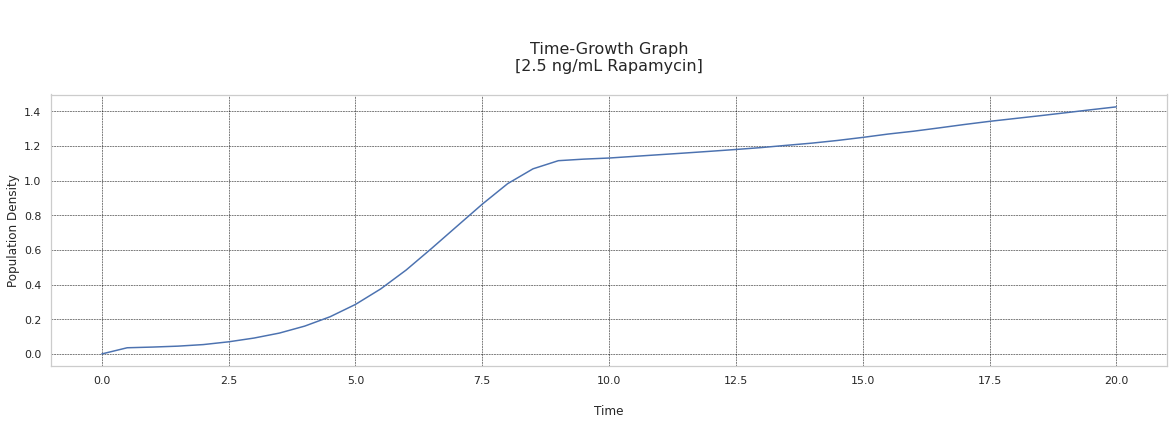

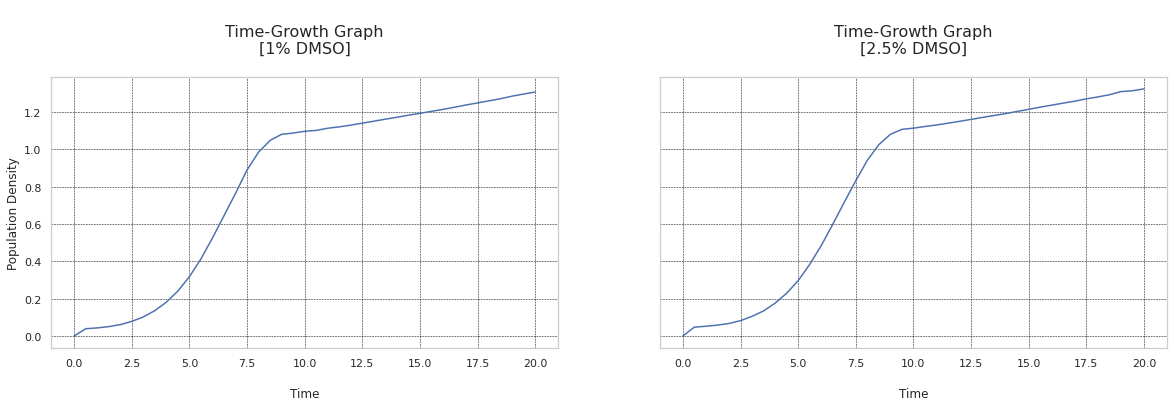

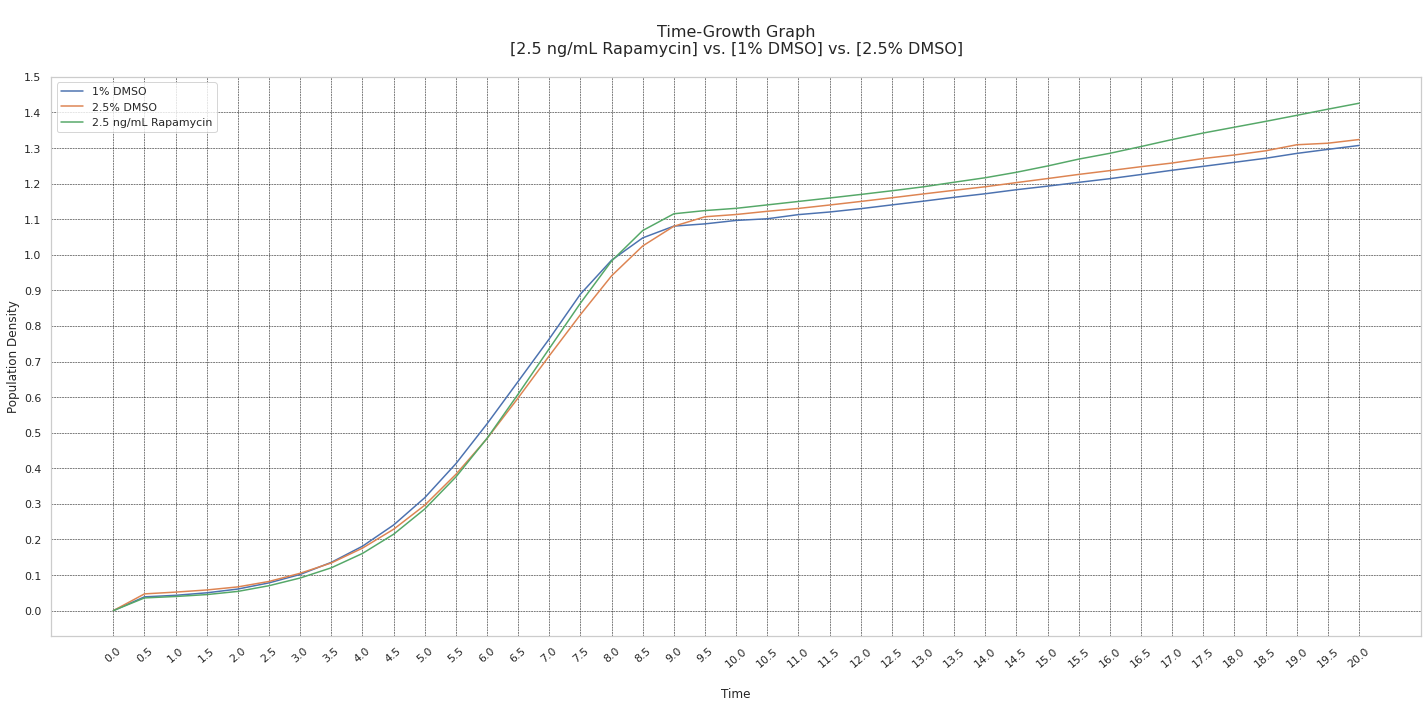

In [84]:
time_graph_DMSO_RAPA(y1=y1_1, y2=y2_1, y3=y3_1, rapa="2.5 ng/mL Rapamycin")

In [85]:
DMSO1_1_percent, DMSO2_1_percent = percent(y1_1, y2_1, y3_1, te1_2)
print("1% DMSO effect : ", DMSO1_1_percent, "\n2.5% DMSO effect : ", DMSO2_1_percent)

1% DMSO effect :  -0.5440082820756031 % 
2.5% DMSO effect :  6.063839938034449 %


**1% DMSO** treatment shows a **0.54%** less doubling time effect, where as the **2.5% DMSO** treatment has a **6.06%** increase in the doubling time.

The graphical representation and percentage analysis show that a treatment free of the vehicle agents in a solution containing **`2.5 ng/mL Rapamycin`** has the highest population growth rate. It can also be seen that a vehicle of **`2.5% DMSO`** in the solution treatment tends to have a higher population growth rate compared to the **`1% DMSO`** solution.

#### Time-Graph for **`20 ng/mL Rapamycin`** and its corresponding **`1% DMSO`** and **`2.5% DMSO`** vehicle treatments

In [86]:
y1_2 = 1
y2_2 = 4
y3_2 = 5

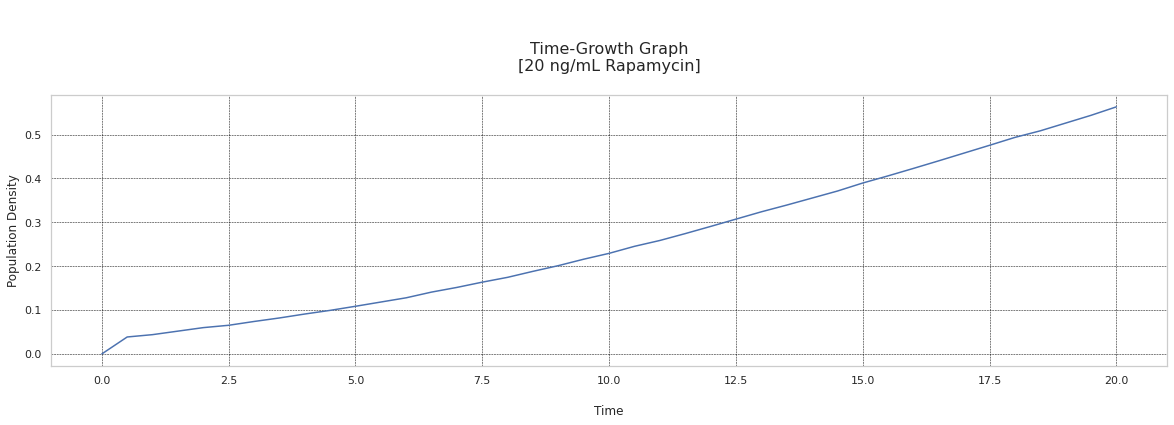

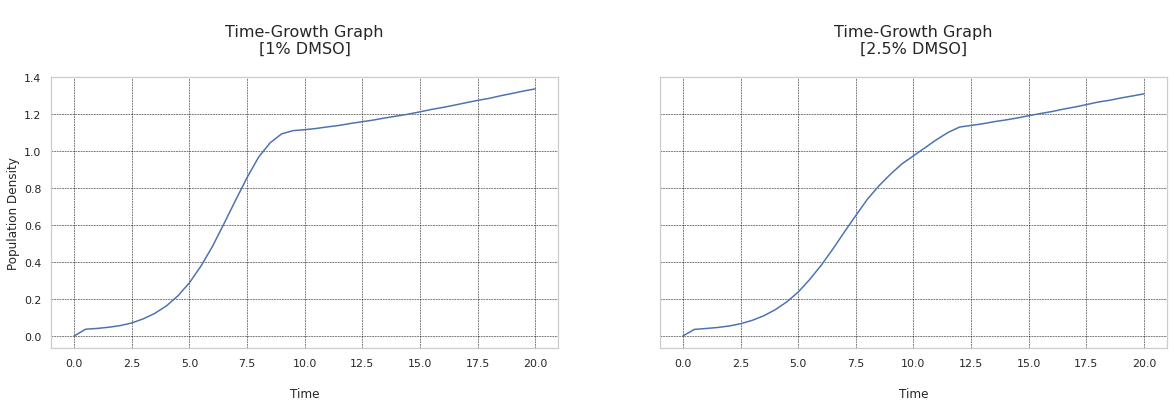

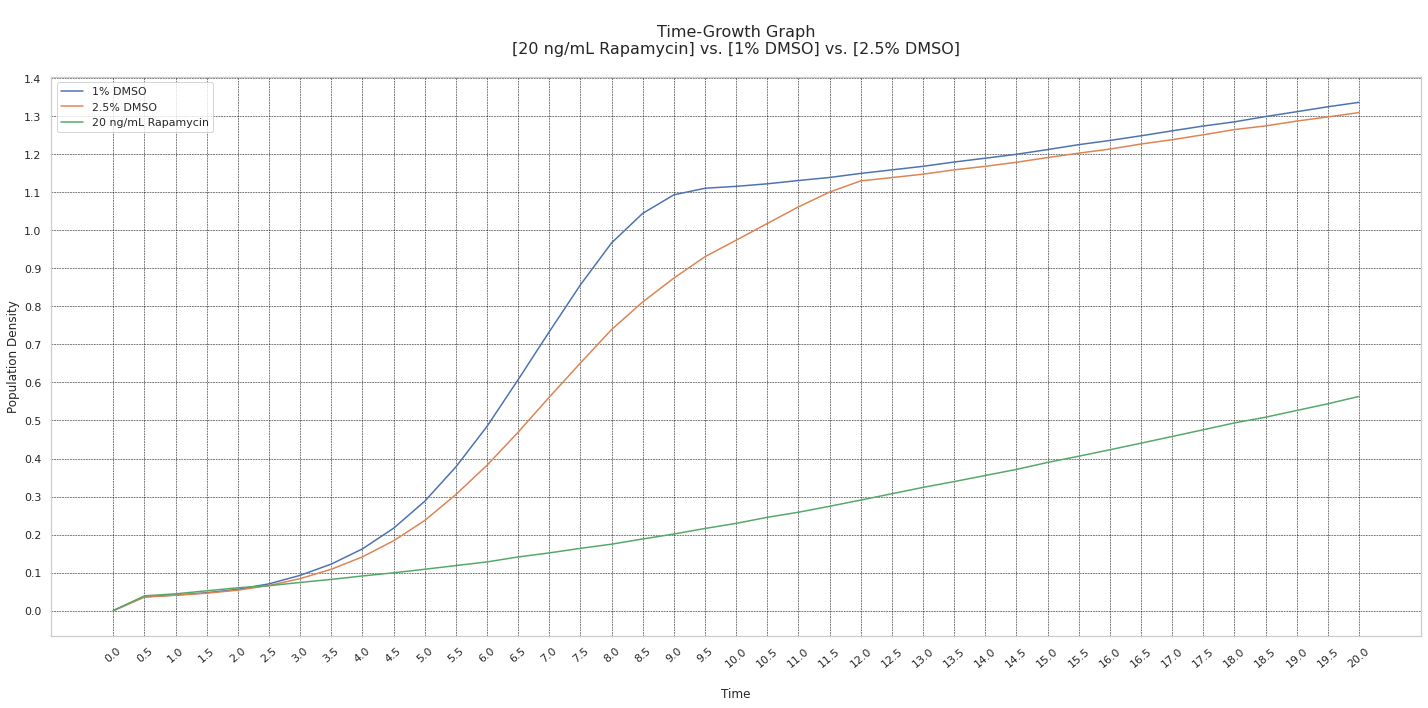

In [87]:
time_graph_DMSO_RAPA(y1=y1_2, y2=y2_2, y3=y3_2, rapa="20 ng/mL Rapamycin")

In [88]:
DMSO1_2_percent, DMSO2_2_percent = percent(y1_2, y2_2, y3_2, te1_2)
print("1% DMSO effect : ", DMSO1_2_percent, "\n2.5% DMSO effect : ", DMSO2_2_percent)

1% DMSO effect :  -71.57904001439435 % 
2.5% DMSO effect :  -68.8276738733965 %


In [91]:
te1_2['DT inflection'].iloc[y3_2]

246.9491257

**1% DMSO** treatment has a **71.57%** less doubling time. Similarily, **2.5% DMSO** experiences a **68.82%** less doubling time effect.

Analysis of the graphical representation and doubling time effects in percentage show that a treatment solution of **`20 ng/mL Rapamycin`** alone has the lowest population growth rate compared to its DMSO vehicle comprising solutions. And it is clear that the yeast strain thrives in the **`1% DMSO`** solution treatment than the **`2.5% DMSO`** solution.

> Based on the above two observations it can be surmised that the application of the **`DMSO`** vehicle has effect on the growth rate of a population, but an ordinance to what concentration, or even the presence of it, will have a constant increasing or decreasing outcome on the population size cannot be determined.

### Rapamycin Effect (%)

If we can get our hands on the neutral growth rate (neutral being without any treatment being applied to the strain), we can set the original doubling time to it. And we can evaluate the effect each treatment has in percent, and then compute for the difference among treatments.

###  Analysis of the relationship between **Treatment** and **Doubling Time** on a particular experiment for the Control group

Get the unique treatments on the Lab strain for the different experiments.

In [ ]:
dt_treat = ({treatments[0] : })

In [56]:
dt_t = df_Control[['DT inflection', 'Treatment']]
dt_t.groupby(['Treatment']).mean()

,DT inflection
Treatment,
1 mg/mL Caffeine,99.813142
1 uM Torin 1,74.964907
1% DMSO,72.749642
100 uM AZD8055,79.755739
100 uM GDC0941,80.136357
2.5 ng/mL RAPA,71.069910
2.5% DMSO,77.491354
20 ng/mL RAPA,214.342431
25 uM Torin 1,99.108238


In [34]:
t_c_df = df_Control.drop_duplicates(subset='Treatment').reset_index(drop=True)
t_c_df.drop(['experiment', 'Line-Treatment', 'StDev_int', 'DT interval', 'Lab strain', 'Strain*Treatment'], axis=1, inplace=True)
t_c_df

,DT inflection,StDev_inf,Strain,Treatment,Time_0,Time_0.5,Time_1,Time_1.5,Time_2,Time_2.5,Time_3,Time_3.5,Time_4,Time_4.5,Time_5,Time_5.5,Time_6,Time_6.5,Time_7,Time_7.5,Time_8,Time_8.5,Time_9,Time_9.5,Time_10,Time_10.5,Time_11,Time_11.5,Time_12,Time_12.5,Time_13,Time_13.5,Time_14,Time_14.5,Time_15,Time_15.5,Time_16,Time_16.5,Time_17,Time_17.5,Time_18,Time_18.5,Time_19,Time_19.5,Time_20
0,88.642690,1.594672,BY4743,1 uM Torin 1,0,0.082333,0.101667,0.116000,0.138333,0.172333,0.216000,0.273000,0.341000,0.421000,0.515667,0.618333,0.735333,0.843000,0.941667,1.022667,1.066333,1.073333,1.077000,1.087000,1.096333,1.103333,1.111333,1.116333,1.134000,1.140667,1.146000,1.164667,1.159333,1.183667,1.188000,1.200333,1.209000,1.217667,1.227000,1.234667,1.247667,1.249000,1.258667,1.277667,1.280000
1,84.383101,4.532748,BY4743,2.5% DMSO,0,0.076000,0.088667,0.100000,0.118000,0.143000,0.181000,0.227667,0.286000,0.363000,0.447000,0.551000,0.667333,0.780000,0.888333,0.986000,1.052333,1.083333,1.094000,1.098333,1.112667,1.117667,1.128333,1.134333,1.144000,1.152667,1.164333,1.173333,1.175667,1.196333,1.204667,1.217333,1.224000,1.233667,1.240667,1.255333,1.266667,1.271000,1.280333,1.289333,1.298333
2,71.956550,1.083065,BY4743,1% DMSO,0,0.038000,0.040333,0.045667,0.054000,0.067667,0.087333,0.115667,0.150000,0.201000,0.264000,0.348333,0.451000,0.564000,0.689000,0.814333,0.919000,0.998667,1.051000,1.069000,1.074667,1.079333,1.089667,1.099000,1.108333,1.118000,1.128000,1.139000,1.151000,1.162000,1.175000,1.186667,1.200667,1.212667,1.225000,1.239000,1.253000,1.264333,1.276333,1.290333,1.302667
3,260.047128,11.569153,BY4743,20 ng/mL RAPA,0,0.038333,0.042000,0.048667,0.054000,0.059000,0.064000,0.068667,0.074000,0.081000,0.086667,0.093000,0.100667,0.108667,0.116000,0.123667,0.131000,0.140000,0.150000,0.158000,0.168000,0.178000,0.188000,0.198667,0.211333,0.221333,0.231667,0.244667,0.256333,0.269333,0.281333,0.293667,0.308333,0.320333,0.333000,0.346000,0.362000,0.376333,0.389000,0.405667,0.421000
4,64.013175,2.594965,BY4743,2.5 ng/mL RAPA,0,0.036667,0.039667,0.042667,0.049667,0.056667,0.089000,0.118000,0.158000,0.218667,0.269333,0.349667,0.438333,0.541667,0.644333,0.753333,0.857667,0.942000,1.001000,1.011667,1.024667,1.032333,1.046333,1.054667,1.065000,1.079333,1.098333,1.118000,1.140667,1.162333,1.189000,1.209333,1.231333,1.251333,1.275000,1.295333,1.315000,1.332667,1.347000,1.363667,1.382000
5,69.927220,1.537758,BY4743,6.67% H2O,0,0.044667,0.047667,0.056000,0.068667,0.076333,0.118333,0.157000,0.211333,0.278000,0.362333,0.463000,0.571333,0.682667,0.787667,0.871667,0.924333,0.940667,0.938667,0.946333,0.958000,0.965333,0.973000,0.981333,0.987000,0.996000,1.007000,1.017333,1.029667,1.040667,1.051333,1.065333,1.079000,1.090333,1.106000,1.117333,1.134333,1.145667,1.157333,1.168333,1.181667
6,108.240802,6.526496,BY4743,25 uM Torin 1,0,0.037333,0.039333,0.040000,0.040000,0.042000,0.043000,0.044667,0.046333,0.047000,0.048333,0.050000,0.051667,0.053333,0.055333,0.057667,0.060333,0.063333,0.066000,0.070667,0.074667,0.078667,0.084667,0.092000,0.100000,0.110000,0.122000,0.136667,0.156333,0.183333,0.215667,0.256667,0.309333,0.374333,0.449000,0.537333,0.636333,0.737667,0.844000,0.942000,1.026667
7,65.557543,3.033790,BY4743,100 uM GDC0941,0,0.032000,0.039000,0.050333,0.065000,0.088333,0.124667,0.175333,0.232000,0.318667,0.425000,0.545333,0.683333,0.831667,0.985667,1.087333,1.099667,1.121000,1.140333,1.162667,1.196000,1.225000,1.256000,1.288333,1.319667,1.354000,1.381667,1.411000,1.437667,1.461333,1.488333,1.507333,1.529333,1.546667,1.564333,1.581000,1.596333,1.611333,1.624333,1.636333,1.646000
8,90.524319,4.569443,BY4743,1 mg/mL Caffeine,0,0.041000,0.040333,0.042000,0.044333,0.049667,0.055000,0.062000,0.070000,0.080333,0.095333,0.113333,0.135000,0.163000,0.199000,0.245333,0.308333,0.384000,0.477333,0.586667,0.703000,0.820667,0.928333,1.022000,1.099667,1.159667,1.201000,1.223667,1.235667,1.245000,1.254667,1.261333,1.270000,1.278667,1.285333,1.293667,1.303000,1.310667,1.317333

In [35]:
dr_f = ['DT inflection', 'StDev_inf', 'Strain', 'Treatment']
one = (t_c_df.iloc[0]).drop(dr_f)
two = (t_c_df.iloc[1]).drop(dr_f)
three = (t_c_df.iloc[2]).drop(dr_f)
four = (t_c_df.iloc[3]).drop(dr_f)
five = (t_c_df.iloc[4]).drop(dr_f)
six = (t_c_df.iloc[5]).drop(dr_f)
seven = (t_c_df.iloc[6]).drop(dr_f)
eight = (t_c_df.iloc[7]).drop(dr_f)
nine = (t_c_df.iloc[8]).drop(dr_f)
ten = (t_c_df.iloc[9]).drop(dr_f)

In [36]:
d = t_c_df.drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'], axis=1)
d_plot = list()
for i in range(10):
    d_plot.append([j + (t_c_df['DT inflection'].iloc[i]) for j in d.iloc[i]])

In [37]:
d_plot

[[88.64268986,
  88.725023193,
  88.74435652700001,
  88.75868986,
  88.78102319300001,
  88.815023193,
  88.85868986,
  88.91568986,
  88.98368986,
  89.06368986000001,
  89.15835652700001,
  89.261023193,
  89.378023193,
  89.48568986000001,
  89.58435652700001,
  89.665356527,
  89.70902319300001,
  89.716023193,
  89.71968986,
  89.72968986000001,
  89.73902319300001,
  89.746023193,
  89.75402319300001,
  89.759023193,
  89.77668986,
  89.78335652700001,
  89.78868986,
  89.80735652700001,
  89.80202319300001,
  89.826356527,
  89.83068986,
  89.84302319300001,
  89.85168986000001,
  89.86035652700001,
  89.86968986000001,
  89.877356527,
  89.89035652700001,
  89.89168986,
  89.901356527,
  89.92035652700001,
  89.92268986],
 [84.38310148,
  84.45910147999999,
  84.47176814699999,
  84.48310147999999,
  84.50110147999999,
  84.52610148,
  84.56410147999999,
  84.61076814699999,
  84.66910148,
  84.74610148,
  84.83010148,
  84.93410148,
  85.050434813,
  85.16310148,
  85.2714348

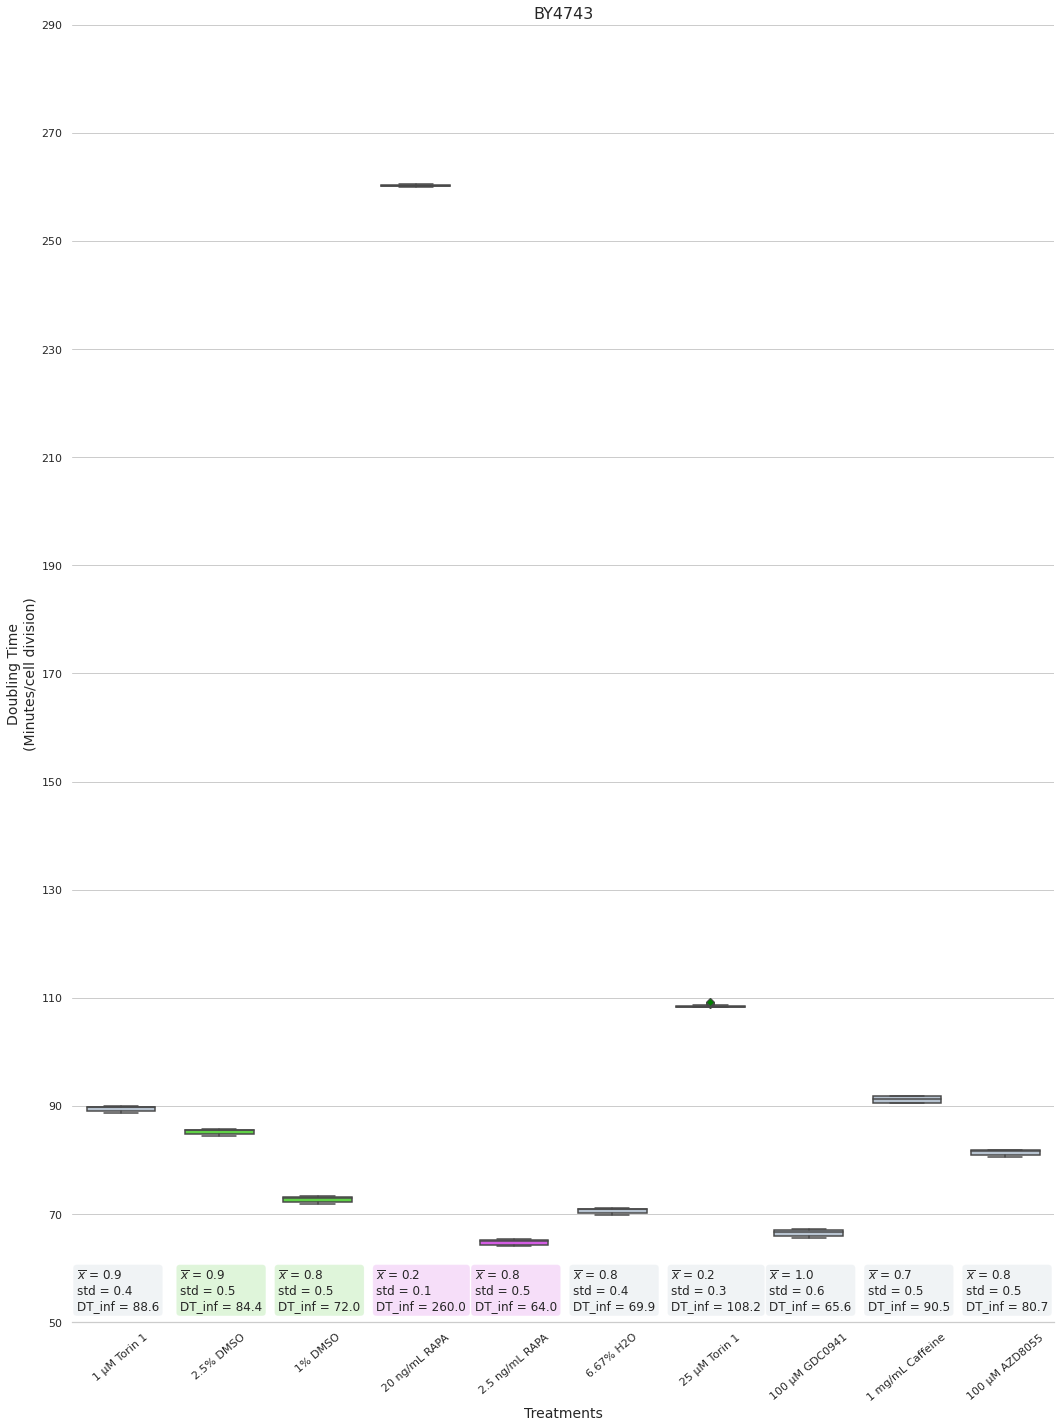

In [38]:
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(15,20))

flier = dict(markerfacecolor='green', marker='D')
# mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

g = sns.boxplot(data=d_plot, #pd.concat([one, two, three, four, five, six, seven, eight, nine, ten], axis=1), 
                width=.7, 
                flierprops=flier)
                # showmeans=True,
                # meanprops=mean_shape)

xvalues = ["1 µM Torin 1", "2.5% DMSO", "1% DMSO", "20 ng/mL RAPA", "2.5 ng/mL RAPA", "6.67% H2O", "25 µM Torin 1", "100 µM GDC0941", "1 mg/mL Caffeine", "100 µM AZD8055"]
plt.xticks(np.arange(10), xvalues, rotation=40)
plt.yticks(np.arange(50,300,20))
# plt.yticks(np.arange(54, 300, 75)) #d_plot)  #[55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 250, 255, 260, 265])

# setting title
plt.title("BY4743", fontsize=16)
# x and y labels
plt.xlabel("Treatments", fontsize=14)
plt.ylabel("Doubling Time\n(Minutes/cell division)", fontsize=14)

# set colors for the box plots
palette = ['#B7C3D0', '#60d147', '#60d147', "#d35de3", "#d35de3", '#B7C3D0', '#B7C3D0', '#B7C3D0', '#B7C3D0', '#B7C3D0']
color_dict = dict(zip(xvalues, palette))
for i in range(0,10):
    mybox = g.patches[i]
    mybox.set_facecolor(color_dict[xvalues[i]])

# Mini text showing mean and standard deviation
locs = [-0.45, 0.6, 1.6, 2.6, 3.6, 4.6, 5.6, 6.6, 7.6, 8.6]

for j in range(10):
    mean = round((t_c_df.iloc[j].drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])).mean(), 1)
    std = round((t_c_df.iloc[j].drop(['DT inflection', 'StDev_inf', 'Strain', 'Treatment'])).std(), 1)
    dt_inf = round(t_c_df['DT inflection'][j], 1)
    textstr = "$\overline {x}$" + f" = {mean} \nstd = {std} \nDT_inf = {dt_inf}"
    props = dict(boxstyle='round', facecolor=palette[j], alpha=.2)
    g.text(locs[j], 52.4, textstr, fontsize=12, bbox=props)

#remove spines
sns.despine(top=True, right=True, left=True, bottom=False)

plt.tight_layout()

plt.show()